# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.
1. **Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)**

In [2]:
airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding='latin-1')
airbnb['Price'] = airbnb['Price'].replace([','],'', regex=True).astype(int)
print('Missing Values: ', airbnb['Price'].isna().sum())

Missing Values:  0


The `Price` variable measures the cost (most likely per night) of a given Airbnb listing in dollars as an integer. However, because there are commas in the original formatting, we can't evaluate the variable as numeric without cleaning it first. So, to clean the `Price` variable, I remove the commas and convert the data type to integer.

2. **Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.**

In [3]:
mm_police = pd.read_csv('data/mn_police_use_of_force.csv')
print('Possible Values in subject_injury: ', mm_police['subject_injury'].unique())
print('Proportion of Missing Injury Values (proportion of nan): ', mm_police['subject_injury'].isna().mean())

Possible Values in subject_injury:  [nan 'No' 'Yes']
Proportion of Missing Injury Values (proportion of nan):  0.7619342359767892


In [4]:
pd.crosstab(index=mm_police['subject_injury'], columns=mm_police['force_type'], margins=True)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser,All
subject_injury,,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150,1446
Yes,2,1286,41,0,44,40,2,44,172,1631
All,2,2379,172,2,77,74,3,46,322,3077


In [5]:
mm_police['subject_injury'] = mm_police['subject_injury'].fillna('Missing')
pd.crosstab(index=mm_police['subject_injury'], columns=mm_police['force_type'], margins=True)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser,All
subject_injury,,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985,9848
No,0,1093,131,2,33,34,0,1,0,2,150,1446
Yes,2,1286,41,0,44,40,0,2,0,44,172,1631
All,4,9430,1593,2,104,148,87,3,170,77,1307,12925


The main pattern is that for most rows, data about `subject_injury` is missing. However, in looking at the `force_type` variable, there are no rows where data for this feature is missing. Because of this, for most observations of all force types, there is missing data for `subject_injury`. The only categories for which 'Yes' or 'No' values outnumbered 'Missing' were Firearm (for which there were no injuries), Gun Point Display (for which a higher proportion of people were injured), less lethal projectile (for which a higher proportion of people were injured), and police k9 bite (for which a higher proportion of people were injured). For all other force types, the majority, if not all, of observations had missing data for `subject_injury`. The conclusion that we can draw from this is that almost all patterns seen when looking at only 'Yes' and 'No' values for `subject_injury` are possibly misleading or inaccurate.

3. **Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.**

In [6]:
metabric = pd.read_csv('data/metabric.csv')
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace({'0:LIVING':'1','1:DECEASED':'0'})
    # has to originally be strings otherwise it causes a warning
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].astype(int)
metabric['Overall Survival Status'].head()

0    1
1    0
2    1
3    0
4    0
Name: Overall Survival Status, dtype: int64

4. **Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?**

In [7]:
print("Missing Values: ", airbnb['Review Scores Rating'].isna().sum())

Missing Values:  8323


In [8]:
airbnb['Review Scores Rating Filled'] = airbnb['Review Scores Rating'].fillna(airbnb['Review Scores Rating'].median())
print("Missing Values: ", airbnb['Review Scores Rating Filled'].isna().sum())

Missing Values:  0


This may bias the data because it assumes that all missing values would have the median score, and since the current non-missing data may not be an entirely accurate representation of airbnb scoring, this imputation could skew the results. For example, if airbnb listings are more likely to receive a review if they were particularly bad, then the non-missing data would be skewed towards lower scores, and inputting the median score could misrepresent what would be the actual scores for the data.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. **Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?**


In [8]:
shark = pd.read_excel('data/GSAF5.xls')

2. **Drop any columns that do not contain data.**

In [9]:
shark = shark.dropna(thresh=len(shark.index)/2, axis=1)
    # I'm taking this to mean dropping columns where most values are nan because if we just do axis=1, then we drop all columns except for date...
    # and if we drop rows instead of columns, there's no data left LOL 
    # and if we just do how='all' then there's no change
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,N,1820hrs,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Y,1620hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,N,0540hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN


3. **What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.**

An observation is one data point in a dataset, to which qualities are associated to by variable values. In this dataset, an observation corresponds to a shark attack.



4. **Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?**

In [10]:
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')
    # initially tried to do .astype(int) by itself but got an error bc of non numeric values
print('Shark Attack Year Range: ' , shark['Year'].min(), 'to', shark['Year'].max())
shark[shark['Year']==0.0].head(3)

Shark Attack Year Range:  0.0 to 2026.0


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
6941,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,...,Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,214BC-Tharsus,214BC,130.0
6942,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,...,Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,336BC-Csrnathus,336BC,129.0
6943,Ca. 493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,493BC-PersianFleet,493BC,128.0


The year variable ranges from before the year 0 C.E. (though recorded as 0.0 in the dataset) to 2026.

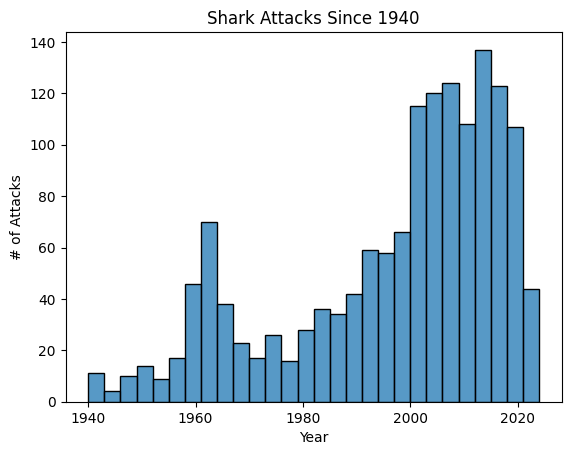

In [11]:
shark_yr_filtered = shark[shark['Year'] >= 1940].dropna()
shark_yr_filtered['Year'] = shark_yr_filtered['Year'].astype(int)

sns.histplot(data=shark_yr_filtered, x='Year', bins=range(1940, 2026, 3))
plt.xlabel('Year')
plt.ylabel('# of Attacks')
plt.title('Shark Attacks Since 1940')
plt.show()

Based on this dataset, we would assume that shark attacks are increasing over time.

5. **Clean the Age variable and make a histogram of the ages of the victims.**

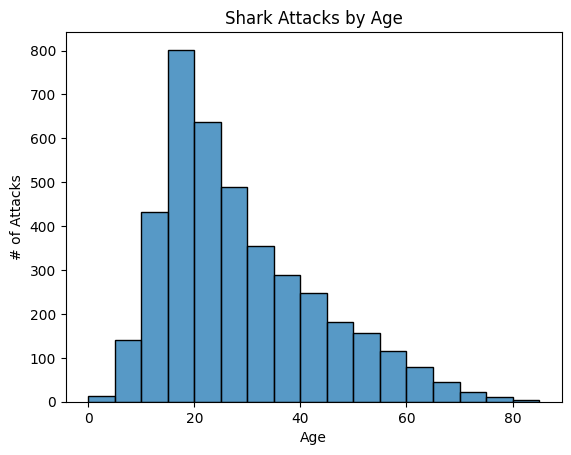

In [12]:
shark_age = shark.copy()
shark_age['Age'] = shark_age['Age'].dropna()
    # even after doing this, the values left behind are very messy... 
    # in some cases there are two or more ages recorded or a rough estimate like "middle age"
    # for the sake of preserving some of the data, I'm going to extract the first number I see in each entry (where applicable)
    # convert "60s" to 60, '60+' to 60, ranged value to mean of the two numbers,
    # i will assume !2 and !6 are typos for 12 and 16 respectively
    # for month ages i will convert to fractional years
    # and then drop anything that can't be converted to a workable number LOL
irregular_ages = ['50+', '30+', '40+', '60+', '30s', '20/30', '20s', '!2', '50s', '40s','!6', '!!',
       '45 and 15', '28 & 22', '22, 57, 31', '60s', "20's", '9 & 60', '40?', '18 months', '28 & 26', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', '36 & 26', '8 or 10', '30 or 36', '6½', '21 & ?', '33 or 37', 'mid-30s', '23 & 20',
       '7      &    31', '20?', "60's", '32 & 30', '16 to 18', 'mid-20s', 'Ca. 33', '21 or 26', '>50', '18 to 22',
       '9 & 12', '? & 19', '9 months', '25 to 35', '23 & 26', '33 & 37', '25 or 28', '37, 67, 35, 27,  ? & 27', 
       '21, 34,24 & 35', '30 & 32', '50 & 30', '17 & 35', '13 or 18', '34 & 19', '33 & 26', 
       '2 to 3 months', '7 or 8', '17 & 16', 'Both 11', '9 or 10', '36 & 23','?    &   14', 
       '10 or 12', '31 or 33', '2½', '13 or 14']
estimated_ages = ['50', '30', '40', '60', '30', '25', '20', '12', '50', '40','16', '11',
       '45', '28', '22', '60', '20', '9','40', '1.5', '28', '19', '12.5','46', '28', '36', 
       '9', '33', '6.5', '21', '35', '35', '23','7', '20', '60', '32', '17', '25', '33', 
       '23.5', '55', '20', '9', '19', '0.75', '30', '23', '33', '27.5', '37', '21', '30', 
       '50', '17', '15.5', '34', '33', '0.33', '7.5', '17', '11', '9.5', '36','14', '11', 
       '32', '2.5', '13.5'] 

shark_age['Age'] = shark_age['Age'].replace(irregular_ages, estimated_ages)
shark_age['Age'] = pd.to_numeric(shark_age['Age'], errors='coerce')
shark_age = shark_age.dropna(subset=['Age'])


sns.histplot(data=shark_age, x='Age', bins=range(0, 90, 5))
plt.xlabel('Age')
plt.ylabel('# of Attacks')
plt.title('Shark Attacks by Age')
plt.show()

6. **Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?**

In [13]:
shark['Type'] = shark['Type'].str.strip().str.capitalize()
shark['Type'] = shark['Type'].replace({'Questionable':'Unknown','Watercraft':'Unknown','Sea disaster':'Unknown', np.nan:'Unknown', 'Unconfirmed':'Unknown',
                                       '?':'Unknown', 'Unverified':'Unknown', 'Invalid':'Unknown', 'Under investigation':'Unknown', 'Boat':'Unknown'})
print("Proportion of unprovoked shark attacks:", len(shark[shark['Type']=='Unprovoked'])/len(shark))

Proportion of unprovoked shark attacks: 0.7386138613861386


7. **Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.**

In [14]:
shark['Fatal Y/N'] = shark['Fatal Y/N'].str.strip().str.capitalize()
shark['Fatal Y/N'] = shark['Fatal Y/N'].replace({'F':'Unknown', 'M':'Unknown', np.nan:'Unknown', 'Nq':'N', 'Y x 2':'Y'})
print(shark['Fatal Y/N'].unique())

['N' 'Y' 'Unknown']


8. **Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?**

In [21]:
fatal_provoked = pd.crosstab(shark['Fatal Y/N'], shark['Type'])
print('Proportion of unprovoked shark attacks that are fatal: ', fatal_provoked.loc['Y','Unprovoked']/fatal_provoked.loc[:,'Unprovoked'].sum())
print('Proportion of provoked shark attacks that are fatal: ', fatal_provoked.loc['Y','Provoked']/fatal_provoked.loc[:,'Provoked'].sum())


Proportion of unprovoked shark attacks that are fatal:  0.24262734584450402
Proportion of provoked shark attacks that are fatal:  0.03260869565217391


Generally, an attack is more likely to be unprovoked in general, and the same is true of fatal attacks (as in, most fatal attacks are unprovoked). And, looking proportionally within each attack type, 24% of unprovoked attacks are fatal while only 3% of provoked attacks are fatal. So, it appears that attacks are more likely to be fatal when they are unprovoked.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. **Read the abstract. What is this paper about?**
   This paper is about data tidying and specifically, how the idea of a tidy dataset (each observation is a row, each variable is a column, and each of observational unit is a table) can make this process more efficient and standardized.

  2. **Read the introduction. What is the "tidy data standard" intended to accomplish?**
   First, having a standard in general is meant to make initial data cleaning easier so that you don't need to "reinvent the wheel" every time. Second, the "tidy data stdanrd" is supposed to "facilitate initial exploration and analysis of the data" and make it easier to create data analytics tools that work together.

  3. **Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**
   The first sentence is saying that because tidy datasets are a standards structure, each tidy dataset will have a similar layout and can be analyzed using similar tools. However, every messy dataset isn't necessarily designed with a standard in mind, so each messy dataset will have a unique layout and process for how to understand/analyze. 
   
   The second sentence is saying that it's difficult to have a clear-cut rule for which sorts of things are variables and which sorts of things are observations because they are usually context-dependent, but this context usually makes it easy to see which parts of the dataset are observations and which are variables.

  4. **Read Section 2.2. How does Wickham define values, variables, and observations?**
   Values are the sorts of things that are collected in a dataset, and they can be quantitative (numbers) or qualitative (strings). Variables contain all values that measure the same underlying attribute across units (observations). An observation contains all values measured on the same unit across attributes (variables).

  5. **How is "Tidy Data" defined in section 2.3?**
   Tidy Data is a way of mapping a dataset to its structure such that each observation is a row, each variable is a column, and each type of observational unit is a table.

  6. **Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**
   The five most common problems are column headers are values (instead of variable names), multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, or a single observational unit is stored in multiple tables. 

   The data in Table 4 are messy because both the columns and the rows are variables, and these variables are headed by values instead of variable names. 

   "Melting" a dataset means to stack it such that columns become rows and values become columns.

  7. **Why, specifically, is table 11 messy but table 12 tidy and "molten"?**
   First, table 11 is messy because variables are stored as values (as in tmax and tmin), observations are stored in both rows and columns (the day number should be used to identify an observation), and there are columns with no associated values. Table 12 is "molten" and (almost) tidy because it was melted - the d1-d31 columns have been made into rows, which is closer to tidy because this records information about an observation (not a variable).

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.

In [22]:
foreign_gifts = pd.read_csv("data/ForeignGifts_edu.csv")
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

In [25]:
foreign_gifts['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

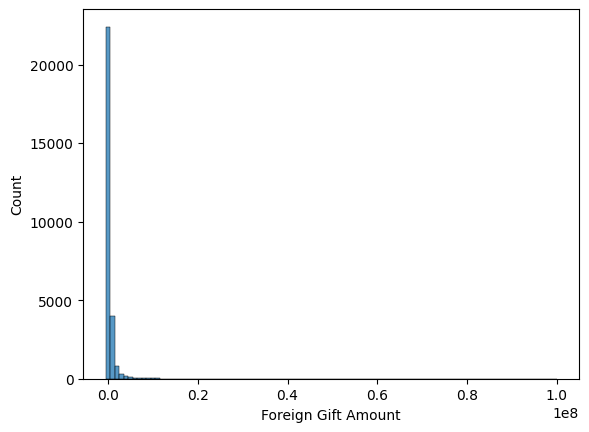

In [26]:
sns.histplot(foreign_gifts, x='Foreign Gift Amount', bins=100)
plt.show()

Generally, there are many smaller foreign gifts, but there are a few extremely large foreign gifts, which skews the distribution to the right. The mean foreign gift amount is $588,232.70 while the median foreign gift amount is $94,615, which is a substantial difference. 

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [36]:
foreign_gifts['Gift Type'].value_counts().to_frame()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


Contracts make up 17274/28221 (or, 0.612) of all gifts, monetary gifts make up 10936/28221 (or, 0.388) of all gifts, and Real Estate makes up 11/28221 (or, 0.00039) of all gifts.

4. **What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?**

In [37]:
foreign_gifts['Country of Giftor'].value_counts().to_frame().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [39]:
foreign_gifts[['Country of Giftor','Foreign Gift Amount']].groupby('Country of Giftor').sum().sort_values(by='Foreign Gift Amount', ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


5. **What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.**

In [44]:
institutions = foreign_gifts[['Institution Name','Foreign Gift Amount']].groupby('Institution Name').sum().sort_values(by='Foreign Gift Amount', ascending=False)
institutions.head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


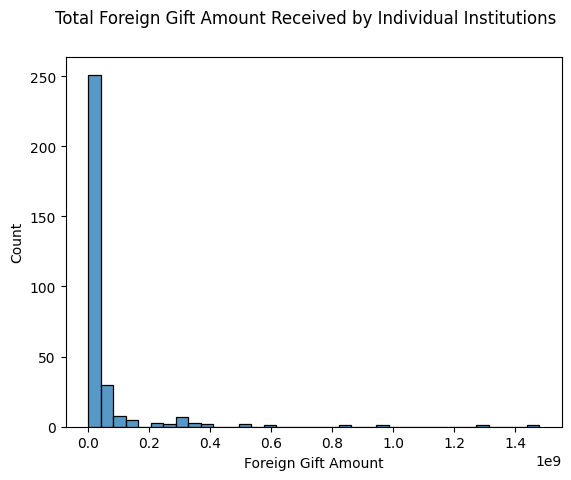

In [47]:
sns.histplot(institutions, x='Foreign Gift Amount')
plt.suptitle('Total Foreign Gift Amount Received by Individual Institutions')
plt.show()

6. **Which giftors provide the most money, in total?**

In [ ]:
foreign_gifts['Giftor Name'] = foreign_gifts['Giftor Name'].replace(['Qatar Foundation/Qatar National Res', 'Qatar Foundation for Education'],
                                                                    ['Qatar Foundation','Qatar Foundation'])
        # all of these seemed to be variations for the same giftor (and they were all some of the top donors)
        # so it seemed better to consolidate them
giftors = foreign_gifts[['Giftor Name','Foreign Gift Amount']].groupby('Giftor Name').sum().sort_values(by='Foreign Gift Amount', ascending=False)
giftors.head(10)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,2336645959
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497
Anonymous #9,96334996
Qatar National Research Fund,79021705


The giftors that provided the most money in total are the Quatar Foundation, anonymous donors, and the Saudi Arabian Cultural Mission.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. **Load the `college_completion.csv` data with Pandas.**

In [58]:
college_comp =  pd.read_csv('data/college_completion.csv')

2. **How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.**

In [60]:
print("There are", college_comp.shape[0], "observations and", college_comp.shape[1], "variables in this dataset")
college_comp.head()

There are 3798 observations and 63 variables in this dataset


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

In [62]:
control_level_ct = pd.crosstab(college_comp['control'], college_comp['level'], margins=True)
control_level_ct

level,2-year,4-year,All
control,,,
Private for-profit,465,527,992
Private not-for-profit,68,1180,1248
Public,926,632,1558
All,1459,2339,3798


Generally, if a college is 4-year, they are more likely to be private. Public schools are more likely to be 2-year programs.

4. **For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?**

In [66]:
college_comp['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

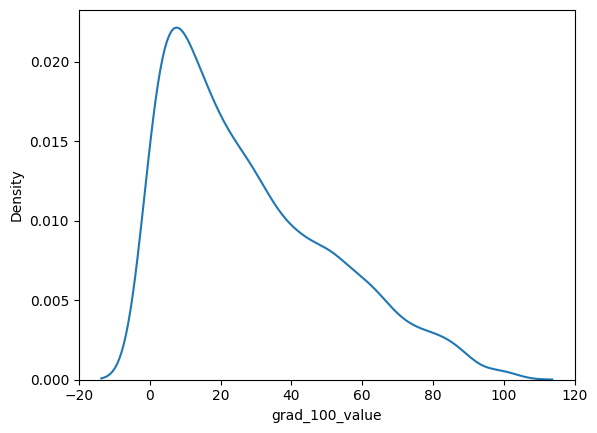

In [63]:
sns.kdeplot(data=college_comp, x='grad_100_value')
plt.show()

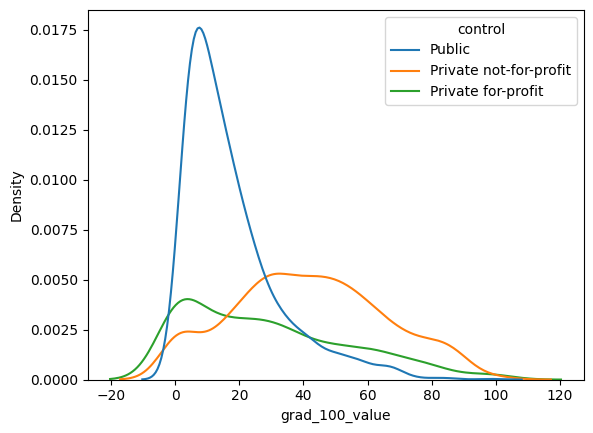

In [67]:
sns.kdeplot(data=college_comp, x='grad_100_value', hue='control')
plt.show()

In [96]:
college_comp['grad_100_value'].groupby(college_comp['control']).describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


The institution type that appears to have the most favorable graduation rates is Private Not-For-Profit universities.

5. **Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?**

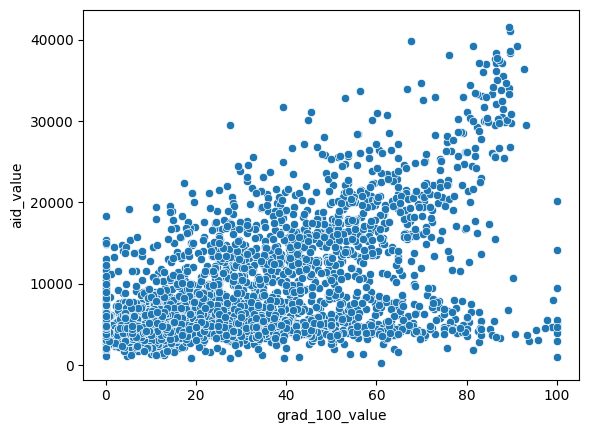

In [72]:
sns.scatterplot(data=college_comp, x='grad_100_value', y='aid_value')
plt.show()

In [79]:
print("Covariance:", college_comp['grad_100_value'].cov(college_comp['aid_value']))
print("Correlation:", college_comp['grad_100_value'].corr(college_comp['aid_value']))

Covariance: 88610.48316902434
Correlation: 0.5758792845936073


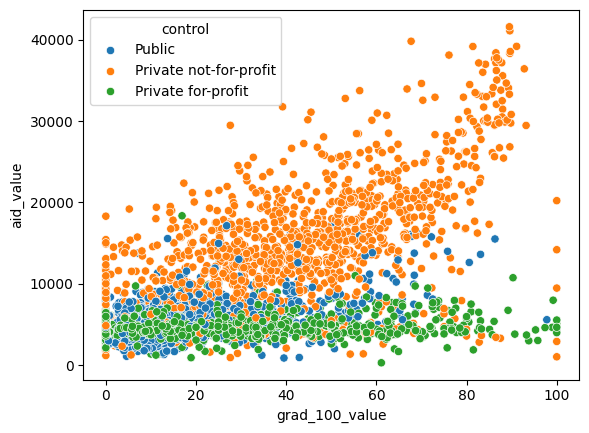

In [80]:
sns.scatterplot(data=college_comp, x='grad_100_value', y='aid_value', hue='control')
plt.show()

In [82]:
for type in college_comp['control'].unique():
    print(f"Relationship Between Aid Value and Graduation Rate at {type} Institutions:")
    print("Covariance:", college_comp[college_comp['control']==type]['grad_100_value'].cov(college_comp['aid_value']))
    print("Correlation:", college_comp[college_comp['control']==type]['grad_100_value'].corr(college_comp['aid_value']), '\n')

Relationship Between Aid Value and Graduation Rate at Public Institutions:
Covariance: 15355.14621176022
Correlation: 0.4824810458983381 

Relationship Between Aid Value and Graduation Rate at Private not-for-profit Institutions:
Covariance: 109274.12333702881
Correlation: 0.6015909241488573 

Relationship Between Aid Value and Graduation Rate at Private for-profit Institutions:
Covariance: 6897.52495723781
Correlation: 0.18836270084245568 



Generally, there is a slight positive correlation between aid value and graduation rate, but this rate is strongest for Private Not-For-Profit institutions. For Private For-Profit institutions, there is generally lower levels of aid given out, and there is little to no correlation between aid value and graduation rate.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. **Show that $m(a + bX) = a+b \times m(X)$.**

![](q6_math/Q_6.1.png)

2. **Show that $ \text{cov}(X,X) = s^2$.**

![](q6_math/Q_6.2.png)

3. **Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$**

![](q6_math/Q_6.3.png)

4. **Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.**

![](q6_math/Q_6.4.png)

5. **Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?**

For the median, yes, it is true that the new median can be found by applying the linear transformation to the original median. This is because the median datapoint will be scaled and shifted in the same way as the whole dataset, so we can find the new median by using the linear transformation on the original median. 

For the IQR, however, it is not true that the new IQR can be found by applying the linear transformation on the original IQR. This is because the IQR measures the spread of the data, which is only affected by the scaling factor b in the linear transformation. Adding the constant 'a' to the old IQR would nt make sense because 'a' oes not afffect the spread, so it is not true that the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$.

6. **Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.**

![](q6_math/Q_6.6.png)


**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. **Load the `ames_prices.csv` data with Pandas.**

In [93]:
ames = pd.read_csv('data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


2. **Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?**

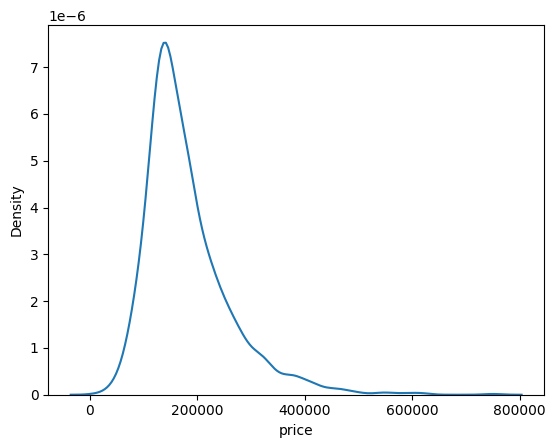

In [87]:
sns.kdeplot(data=ames, x='price')
plt.show()

In [88]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

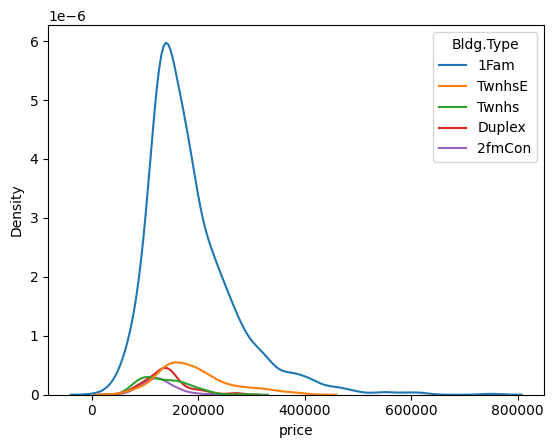

In [94]:
sns.kdeplot(data=ames, x='price', hue='Bldg.Type')
plt.show()

In [95]:
ames.price.groupby(ames['Bldg.Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


The most expensive building types on average are 1Fam and TwnhsE. The building types with the highest price variance (standard deviation) are 1Fam TwnhsE.

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).

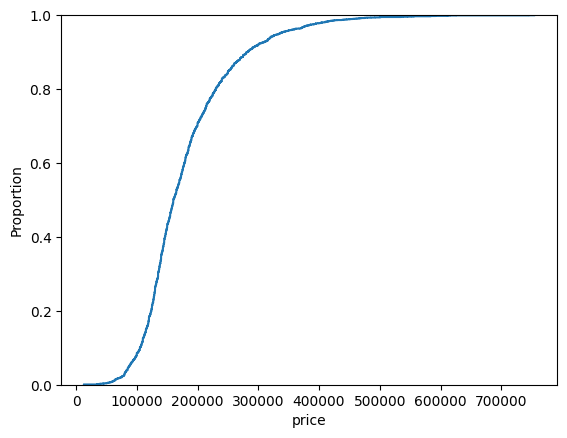

In [98]:
sns.ecdfplot(data=ames, x='price')
plt.show()

In [99]:
print("Min:", ames['price'].min())
print("25% Q:", ames['price'].quantile(0.25))
print("Med:", ames['price'].median())
print("75% Q:", ames['price'].quantile(0.75))
print("Max:", ames['price'].max())


Min: 12789
25% Q: 129500.0
Med: 160000.0
75% Q: 213500.0
Max: 755000


4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?

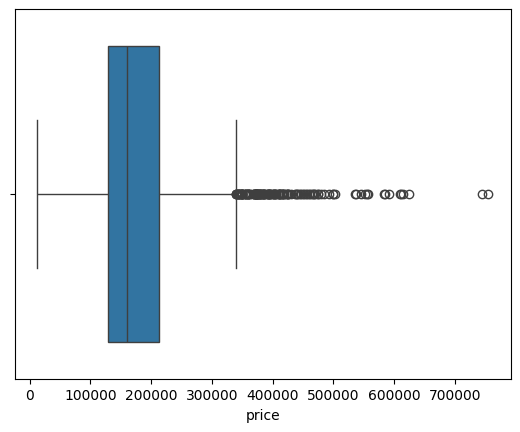

In [101]:
sns.boxplot(data=ames, x='price')
plt.show()

There are outliers present in the boxplot for price.

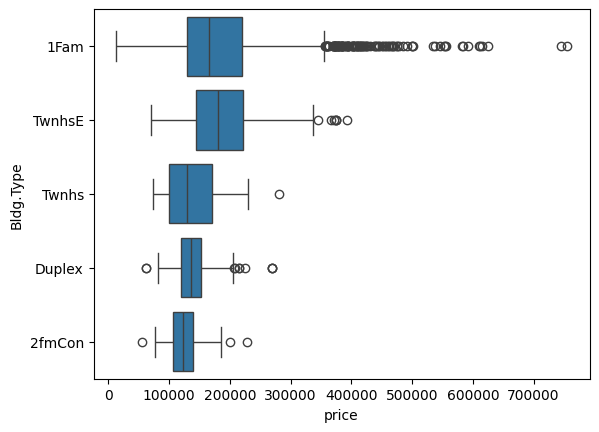

In [103]:
sns.boxplot(data=ames, x='price', y='Bldg.Type')
plt.show()

Generally, the data is right-skwewed for all building types, but it is more skewed for 1Fam and TwnhsE building types. Additionally, 1Fam and TwnhsE building types have higher median prices than the other building types.

5. Make a dummy variable indicating that an observation is an outlier.

In [ ]:
ames['is_outlier'] = ames['price'] > (ames['price'].quantile(0.75) + 1.5 * (ames['price'].quantile(0.75) - ames['price'].quantile(0.25)))  

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,is_outlier
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,False
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,False
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,False
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,False
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,False


6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

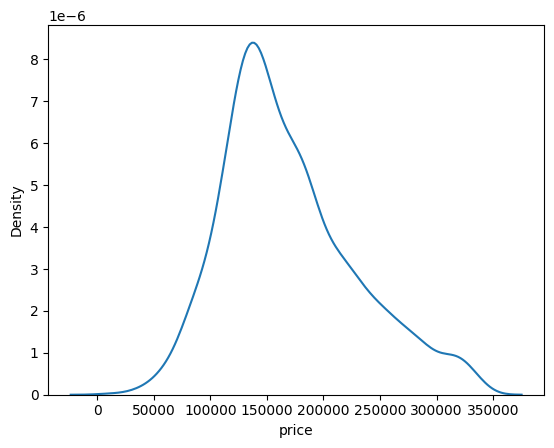

In [106]:
ames = ames[ames['is_outlier']==False]

sns.kdeplot(data=ames, x='price')
plt.show()

In [107]:
ames['price'].describe()

count      2793.000000
mean     169115.500179
std       58989.054743
min       12789.000000
25%      128000.000000
50%      157500.000000
75%      202900.000000
max      338931.000000
Name: price, dtype: float64

The spread decreases, and the the distribution is more symmetric after winsorizing. The mean, median, and standard deviation decrease as well.